<a href="https://colab.research.google.com/github/Abhishekrkd/stock-market-prediction-using-LSTM/blob/main/stockpredlstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Default title text
import pandas_datareader as pdr
key="bd9f58dbf3b09c8146950d2b6f4243564698273e"

In [39]:

df = pdr.get_data_tiingo('AAPL', api_key="bd9f58dbf3b09c8146950d2b6f4243564698273e")

In [40]:
df.to_csv('AAPL.csv')

In [41]:
import pandas as pd

In [42]:
df=pd.read_csv('AAPL.csv')

In [43]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-01-12 00:00:00+00:00,99.96,100.69,98.8399,100.55,49154227,23.149595,23.318654,22.890192,23.286232,196616908,0.0,1.0
1,AAPL,2016-01-13 00:00:00+00:00,97.39,101.19,97.3000,100.32,62439631,22.554412,23.434449,22.533569,23.232967,249758524,0.0,1.0
2,AAPL,2016-01-14 00:00:00+00:00,99.52,100.48,95.7400,97.96,63170127,23.047696,23.270021,22.172291,22.686417,252680508,0.0,1.0
3,AAPL,2016-01-15 00:00:00+00:00,97.13,97.71,95.3600,96.20,79833891,22.494199,22.628520,22.084287,22.278822,319335564,0.0,1.0
4,AAPL,2016-01-19 00:00:00+00:00,96.66,98.65,95.5000,98.41,53087747,22.385352,22.846214,22.116710,22.790632,212350988,0.0,1.0


In [44]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2021-01-04 00:00:00+00:00,129.41,133.6116,126.760,133.52,143301887,129.41,133.6116,126.760,133.52,143301887,0.0,1.0
1254,AAPL,2021-01-05 00:00:00+00:00,131.01,131.7400,128.430,128.89,97664898,131.01,131.7400,128.430,128.89,97664898,0.0,1.0
1255,AAPL,2021-01-06 00:00:00+00:00,126.60,131.0499,126.382,127.72,155087970,126.60,131.0499,126.382,127.72,155087970,0.0,1.0
1256,AAPL,2021-01-07 00:00:00+00:00,130.92,131.6300,127.860,128.36,109578157,130.92,131.6300,127.860,128.36,109578157,0.0,1.0
1257,AAPL,2021-01-08 00:00:00+00:00,132.05,132.6300,130.230,132.43,105158245,132.05,132.6300,130.230,132.43,105158245,0.0,1.0


In [45]:
df1=df.reset_index()['close']

In [48]:
df1.tail(500)

758     154.94
759     155.86
760     156.82
761     153.30
762     153.92
         ...  
1253    129.41
1254    131.01
1255    126.60
1256    130.92
1257    132.05
Name: close, Length: 500, dtype: float64

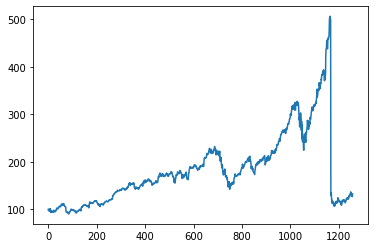

In [47]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [49]:

### LSTM are sensitive to the scale of the data. so we apply MinMax scaler


In [50]:
import numpy as np

In [51]:
df1

0        99.96
1        97.39
2        99.52
3        97.13
4        96.66
         ...  
1253    129.41
1254    131.01
1255    126.60
1256    130.92
1257    132.05
Name: close, Length: 1258, dtype: float64

In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [53]:
print(df1)

[[0.02313891]
 [0.01695731]
 [0.02208058]
 ...
 [0.08721587]
 [0.09760673]
 [0.10032471]]


In [54]:

##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]


In [55]:
training_size,test_size

(817, 441)

In [56]:
train_data

array([[0.02313891],
       [0.01695731],
       [0.02208058],
       [0.01633193],
       [0.01520144],
       [0.01551413],
       [0.01433554],
       [0.02665063],
       [0.02188815],
       [0.02321106],
       [0.0074083 ],
       [0.00901984],
       [0.01683704],
       [0.01464823],
       [0.00995791],
       [0.0144558 ],
       [0.01505713],
       [0.00885147],
       [0.01123271],
       [0.01118461],
       [0.0094528 ],
       [0.00808178],
       [0.00877931],
       [0.01515334],
       [0.01871317],
       [0.01423933],
       [0.01371016],
       [0.01573061],
       [0.01046302],
       [0.01385448],
       [0.01544197],
       [0.01580277],
       [0.0152736 ],
       [0.02450992],
       [0.02503909],
       [0.02684305],
       [0.03047505],
       [0.02773301],
       [0.02571257],
       [0.02592904],
       [0.02604931],
       [0.02867108],
       [0.02929645],
       [0.03425135],
       [0.03759471],
       [0.03718581],
       [0.03747444],
       [0.037

In [57]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)


In [58]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)


In [59]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [60]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [61]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)


In [62]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


In [63]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [64]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [65]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [66]:

model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)


Epoch 1/100
12/12 [==============================] - 8s 274ms/step - loss: 0.0107 - val_loss: 0.0459
Epoch 2/100
12/12 [==============================] - 2s 194ms/step - loss: 0.0018 - val_loss: 0.0229
Epoch 3/100
12/12 [==============================] - 2s 194ms/step - loss: 6.0577e-04 - val_loss: 0.0207
Epoch 4/100
12/12 [==============================] - 2s 196ms/step - loss: 4.6472e-04 - val_loss: 0.0198
Epoch 5/100
12/12 [==============================] - 2s 193ms/step - loss: 2.9269e-04 - val_loss: 0.0185
Epoch 6/100
12/12 [==============================] - 2s 191ms/step - loss: 3.1472e-04 - val_loss: 0.0181
Epoch 7/100
12/12 [==============================] - 2s 194ms/step - loss: 3.0195e-04 - val_loss: 0.0175
Epoch 8/100
12/12 [==============================] - 3s 214ms/step - loss: 2.7155e-04 - val_loss: 0.0170
Epoch 9/100
12/12 [==============================] - 2s 196ms/step - loss: 2.6674e-04 - val_loss: 0.0165
Epoch 10/100
12/12 [==============================] - 2s 200ms/

In [67]:
import tensorflow as tf

In [68]:
tf.__version__

'2.4.0'

In [69]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [70]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [71]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))


161.30201720131188

In [72]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

268.56075770759736

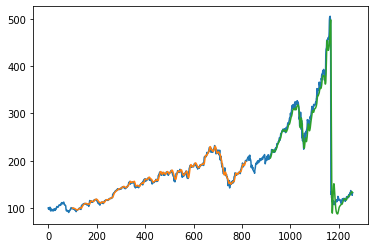

In [73]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [74]:
len(test_data)

441

In [75]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [76]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()


In [77]:
temp_input

[0.89455201443175,
 0.8959470835838845,
 0.9206494287432352,
 0.9792904389657247,
 0.9936019242333134,
 0.9836680697534577,
 1.0,
 0.9854479855682503,
 0.983499699338545,
 0.09308478653036678,
 0.10544798556825014,
 0.09876127480457003,
 0.07345760673481655,
 0.07365003006614551,
 0.05407095610342749,
 0.06489476849067943,
 0.055682501503307225,
 0.052098616957306054,
 0.0601683704149128,
 0.06061334936861096,
 0.05241130487071555,
 0.04810583283223091,
 0.03968731208659049,
 0.04748045700541187,
 0.05164161154539987,
 0.04036079374624174,
 0.04300661455201443,
 0.05277209861695731,
 0.05921828021647624,
 0.05712567648827421,
 0.06126277811184605,
 0.06361996392062536,
 0.05455201443174984,
 0.062922429344558,
 0.05488875526157544,
 0.059506915213469624,
 0.059242333132892344,
 0.06405291641611544,
 0.08192423331328924,
 0.07398677089597111,
 0.07420324714371618,
 0.07304870715574258,
 0.06898376428141911,
 0.061671677690920024,
 0.06535177390258567,
 0.06381238725195432,
 0.0611184606

In [78]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)


[0.09784289]
101
1 day input [0.89594708 0.92064943 0.97929044 0.99360192 0.98366807 1.
 0.98544799 0.9834997  0.09308479 0.10544799 0.09876127 0.07345761
 0.07365003 0.05407096 0.06489477 0.0556825  0.05209862 0.06016837
 0.06061335 0.0524113  0.04810583 0.03968731 0.04748046 0.05164161
 0.04036079 0.04300661 0.0527721  0.05921828 0.05712568 0.06126278
 0.06361996 0.05455201 0.06292243 0.05488876 0.05950692 0.05924233
 0.06405292 0.08192423 0.07398677 0.07420325 0.07304871 0.06898376
 0.06167168 0.06535177 0.06381239 0.06111846 0.0594107  0.05943476
 0.06316296 0.05017438 0.06008419 0.044546   0.04432952 0.04834636
 0.05919423 0.06900782 0.06819002 0.06248948 0.06164762 0.07011425
 0.06944077 0.06956103 0.07206254 0.06987372 0.06660253 0.06806975
 0.06494287 0.05654841 0.05972339 0.06179194 0.06313891 0.06905592
 0.07788334 0.07874925 0.07841251 0.07675286 0.08036079 0.08187613
 0.07562237 0.0791341  0.0771377  0.07562237 0.09029465 0.09012628
 0.09226699 0.08734817 0.0911365  0.09991

In [79]:

day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [80]:
import matplotlib.pyplot as plt

In [81]:
len(df1)

1258

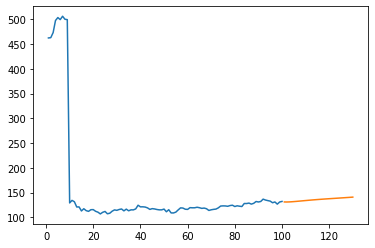

In [82]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))


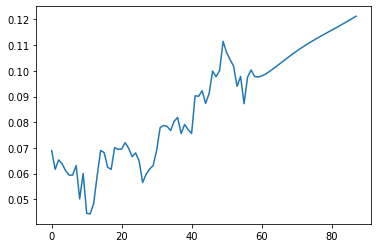

In [83]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])


In [84]:
df3=scaler.inverse_transform(df3).tolist()

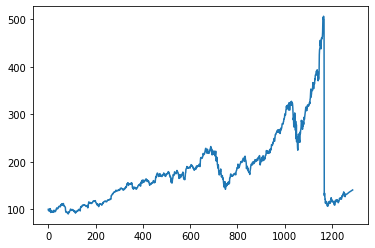

In [85]:
plt.plot(df3)